# Exploratory data analysis

## 1. Dataset description


## 2. Load the dataset

In [140]:
import json
# from tqdm import tqdm
# import os

from functools import reduce
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

In [40]:
set_names = ['rsicd', 'ucm', 'sydney']

def get_img_info(name):
    """
    Returns img paths and captions

    Parameters:
    -----------
    name: str
        the json file name
    
    Return:
    --------
    list, list
        img paths, corresponding captions
    """
    img_path = []
    caption = [] 
    caption_token = []
    with open('../data/interim/' + name + '.json', 'r') as json_data:
        data = json.load(json_data)
        for set_name in set_names:
            for filename in data[set_name].keys():
                img_path.append('../data/raw/imgs/'+ set_name + '/' + filename)
                caption.append([sentence['raw'] for sentence in data[set_name][filename]['sentences']])
                caption_token.append([sentence['tokens'] for sentence in data[set_name][filename]['sentences']])
    
    return img_path, caption, caption_token

In [7]:
# get img path and caption list
train_img_path, train_caption, train_caption_token = get_img_info('train')
valid_img_path, valid_caption, valid_caption_token = get_img_info('valid')

In [8]:
train_img_path[:10]

['../data/raw/imgs/rsicd/church_212.jpg',
 '../data/raw/imgs/rsicd/church_145.jpg',
 '../data/raw/imgs/rsicd/farmland_12.jpg',
 '../data/raw/imgs/rsicd/beach_161.jpg',
 '../data/raw/imgs/rsicd/sparseresidential_227.jpg',
 '../data/raw/imgs/rsicd/pond_60.jpg',
 '../data/raw/imgs/rsicd/denseresidential_31.jpg',
 '../data/raw/imgs/rsicd/00072.jpg',
 '../data/raw/imgs/rsicd/industrial_202.jpg',
 '../data/raw/imgs/rsicd/bareland_43.jpg']

In [9]:
train_caption[:10]

[['some buildings and many green trees are around a gray church .',
  'some buildings and many green trees are around a gray church .',
  'some buildings and many green trees are around a gray church .',
  'some buildings and many green trees are around a gray church .',
  'some buildings and many green trees are around a gray church .'],
 ['a church is near a river with some buildings and green trees .',
  'a church is near a river with some buildings and green trees .',
  'a church is near a river with some buildings and green trees .',
  'a church is near a river with some buildings and green trees .',
  'a church is near a river with some buildings and green trees .'],
 ['several pieces of farmland s are together .',
  'the textures in the farmland are very beautiful .',
  'the textures in the farmland are very beautiful .',
  'several pieces of farmland s are together .',
  'several pieces of farmland s are together .'],
 ['two rows of waves in green ocean are near a yellow beach 

## 3. Explore the dataset

In [141]:
# 1，find max/min length
max_len = 0
min_len = len(train_caption_token[0][0])

for t in train_caption_token:
    for i in t:
        if len(i) > max_len:
            max_len = len(i)
        if len(i) < min_len and len(i) > 1:
            min_len = len(i)

In [142]:
print("The maximum length of training set is", max_len, "\n")
print("The minimum length of training set is", min_len, "\n")

The maximum length of training set is 34 

The minimum length of training set is 2 



In [143]:
# 2. find most common words
flattened = [val for sublist in train_caption_token for val in sublist]
flattened = [val for sublist in flattened for val in sublist]

In [144]:
from collections import Counter
c = Counter(item for item in flattened)

c.most_common(10)

[('a', 35784),
 ('are', 21313),
 ('the', 17532),
 ('green', 16830),
 ('and', 15818),
 ('in', 15584),
 ('many', 14712),
 ('of', 14579),
 ('is', 13738),
 ('trees', 13451)]

In [145]:
comment_words= ""
comment_words += " ".join(flattened)
stopwords = set(STOPWORDS) 

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10,
                collocations = False).generate_from_frequencies(c) 

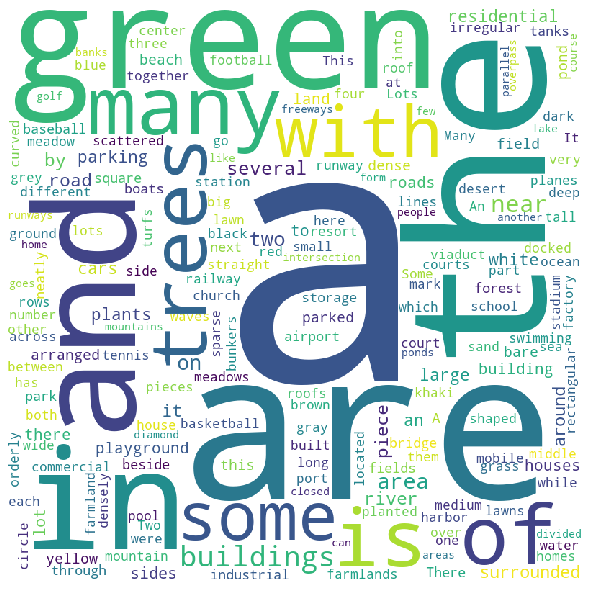

In [146]:
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

## 4. Initial thoughts


## 5. Wrangling

## 6. Research questions



## 7. Data Analysis & Visualizations

## 8. Summary and conclusions
